# STUDENT PERFORMANCES
## Machine Learning project
## Team: Amadou and Jamie

* Analysis of student performances
* Features: 33 
* Data: 649

There are 2 different csv files in the data folder. One (student-port.csv) being the data set of the students that took the portugese language course and another (student-mat.csv) of the students that are taking the math course. There are 382 students that are taking both courses. 
## * We will only be using the student-port.csv file
More information about the dataset is in the data folder, labeled student.txt

In [1]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import StandardScaler, PolynomialFeatures  
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
from sklearn import metrics
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv("data\student-por.csv",sep=";") #read file from different directory
df2 = pd.read_csv("data\student-mat.csv", sep = ";")
print(df1)
#df1.to_csv("port.csv") # made in to a csv after being made in to a table - easier to read compared to original excel file


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [3]:
#Splitting the data accordingly
X = df1.iloc[:, :30]
y = 0.3 * df1.iloc[:, 30] + 0.3 * df1.iloc[:, 31] + 0.4 * df1.iloc[:, 32]
X.dropna()
y.dropna()

0       7.7
1      10.4
2      12.3
3      14.0
4      12.4
       ... 
644    10.3
645    15.4
646    10.5
647    10.0
648    10.7
Length: 649, dtype: float64

In [4]:
def fixingfile(X):
    switch = {0: ("GP", "MS"), 1: ("F", "M"), 3: ("U", "R"), 4: ("LE3", "GT3"), 5:("T", "A"), 15:("yes","no"), 16:("yes","no"),
             17:("yes","no"), 18:("yes","no"), 19:("yes","no"), 20:("yes","no"), 21:("yes","no"), 22:("yes","no")}
    for column in range(len(X.columns)):
        if column not in switch:
            continue
        for i in range(len(X.iloc[:,column])):
           #print(X.iloc[i, column] == "U",X.iloc[i, column], switch[column])
            if X.iloc[i,column] == switch[column][0]:
                #print(X.iloc[i, column], switch[column][0])
                X.iloc[i,column] = 1
            elif X.iloc[i, column] == switch[column][1]:
                X.iloc[i,column] = 0
    X.drop(["Mjob", "Fjob", "reason", "guardian"], axis = 1, inplace=True) #Remove the ones with more than 1 and 0 answers
    print(X.shape) #Checking the shape of the features
    
    return X

In [5]:
X_fixed = fixingfile(X)
#X_fixed.to_csv("portfix.csv") 
y = np.array(y) #changed to array to be easier to work with
X = np.array(X_fixed)


(649, 26)


In [6]:
X_scale = StandardScaler()
X = np.array(X_scale.fit_transform(X))

In [7]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Linear Regression

## 1. Multiple Linear Regression
### Some of the code below are taken from hw2

In [8]:
#reshaping ys to 2d
y_2d_train = y_train.reshape(y_train.shape[0], 1)
y_2d_test = y_test.reshape(y_test.shape[0],1)
print("Checking y_2d_train is in 2d:", y_2d_train.shape)
print("Checking y_2d_test is in 2d:", y_2d_test.shape)

Checking y_2d_train is in 2d: (389, 1)
Checking y_2d_test is in 2d: (260, 1)


In [9]:
n_train = y_2d_train.shape[0]
n_test = y_2d_test.shape[0]
print("Number training of rows:", n_train)
print("Number testing of rows:", n_test)

Number training of rows: 389
Number testing of rows: 260


In [10]:
# Adding the column of ones infront of x_train
ones_train = np.ones((n_train, 1))
X_1_train = np.hstack((ones_train, X_train))
print("X_1 shape:", X_1_train.shape)
print("X_1 with ones: ", X_1_train)

X_1 shape: (389, 27)
X_1 with ones:  [[ 1.          0.73094388  0.83337685 ... -0.21850834  1.01290255
  -0.78915946]
 [ 1.          0.73094388 -1.19993734 ...  1.33986431  1.01290255
  -0.35786305]
 [ 1.          0.73094388  0.83337685 ... -0.99769466 -1.06301457
   0.07343336]
 ...
 [ 1.          0.73094388  0.83337685 ... -0.21850834  1.01290255
  -0.35786305]
 [ 1.         -1.36809408 -1.19993734 ...  1.33986431  1.01290255
   0.07343336]
 [ 1.         -1.36809408  0.83337685 ... -0.99769466  0.32093018
  -0.78915946]]


In [11]:
#Adding ones to testing set
ones_test = np.ones((n_test, 1))
X_1_test = np.hstack((ones_test, X_test))
print("X_1_test shape:", X_1_test.shape)
print("X_1_test with ones: ", X_1_test)

X_1_test shape: (260, 27)
X_1_test with ones:  [[ 1.          0.73094388 -1.19993734 ... -0.99769466 -1.75498694
   1.15167439]
 [ 1.         -1.36809408  0.83337685 ... -0.21850834 -1.75498694
   0.50472977]
 [ 1.         -1.36809408  0.83337685 ...  0.56067799 -1.06301457
  -0.78915946]
 ...
 [ 1.          0.73094388 -1.19993734 ... -0.99769466  1.01290255
   0.07343336]
 [ 1.          0.73094388  0.83337685 ...  0.56067799 -0.3710422
   0.50472977]
 [ 1.          0.73094388 -1.19993734 ...  2.11905063  1.01290255
   0.07343336]]


In [12]:
def compute_cost(X_1, y_2d, w, N):
    # Code hw2
    cost = sum((y_2d- (np.dot(X_1, w)))**2)/(2*N)
    
    return cost[0]

In [13]:
def gradient_descent(X_1, y_2d, learning_rate, w, N, num_iters):
    #code from hw2
    
    for i in range(num_iters):
        # derivative vector is given by : X_train.Transpose *  (( X_train * w)- y ) 
        slope = np.dot(X_1, w)
        der_vector = np.dot(X_1.T,(slope - y_2d))
        w = w - (learning_rate * (1/N)) * der_vector
       
        
        if(i % 100 == 0):
            # In place of ellipsis, call the cost you just coded above
            cost = compute_cost(X_1, y_2d, w, N)
            # You can uncomment print statements below to see how cost changes, 
            # but please make sure you put prints in comments before submission
            #print("Cost")
            #print(cost)
             
    return w 

In [14]:
#Examples and testing from hw2
w_testcase = np.zeros((X_1_train.shape[1],1))
g = gradient_descent(X_1_train, y_2d_train, 0.0049, w_testcase, n_train, 1000)
print(g)
print("g[0]: ", g[0][0])

[[ 1.15549099e+01]
 [ 5.76379326e-01]
 [ 2.45377403e-01]
 [ 1.74392982e-01]
 [-9.47242385e-03]
 [ 5.96096760e-02]
 [ 1.23493903e-01]
 [ 2.65376789e-01]
 [ 2.66864874e-01]
 [-1.51356892e-02]
 [ 3.00201305e-01]
 [-7.59262495e-01]
 [-4.45279737e-01]
 [-5.32542435e-02]
 [-1.55932033e-01]
 [-1.78820252e-02]
 [-9.29068545e-02]
 [ 4.34941889e-01]
 [ 1.09759792e-01]
 [-2.78956738e-01]
 [ 9.41439613e-02]
 [-1.21112224e-01]
 [-8.52176955e-02]
 [-6.18492775e-02]
 [-1.38412948e-01]
 [-8.76547988e-02]
 [-2.58075900e-01]]
g[0]:  11.554909865445058


In [15]:
def multiple_linear_reg_model_gda(X_1, y_2d, learning_rate, N, num_iters):
    #Code from hw2
    w = np.zeros((X_1.shape[1],1))
    
    # Calculate the initial cost by calling the function you coded above.
    initial_cost = compute_cost(X_1, y_2d, w, N)
    
    # Calculate the optimized value of gradients by calling the gradient_descent function coded above
    w = gradient_descent(X_1, y_2d, learning_rate, w, N, num_iters)
    
    # Calculate the cost with the optimized value of w0 and w1 by calling the cost function.
    final_cost = compute_cost(X_1, y_2d, w, N)

    return w, initial_cost, final_cost

# The code below is to find the best possible rsq after running all possible iterations and alphas

In [16]:
def findBest(x_best, y_best, num_rows):
    #Testing numbers on training set
    learning_rate = [0.1, 0.05,0.005, 0.00490, .001, 0.0005 ,0.0001]
    num_iters = [10,100,500, 1000]
    track = {}
    best_rsq = 0
    for nums in num_iters:
        print("*"* 50)
        print(nums)
        for alpha in learning_rate:
            results = multiple_linear_reg_model_gda(x_best, y_best, alpha, num_rows, nums)
            print("Iter is:", nums, "Alpha is:", alpha)
            #print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            print("\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            #print('-'*50)
            rss = 0
            for i in range(num_rows):
                rss += np.sum((np.dot(results[0].T,x_best[i])-y_best[i])**2)
                #I seem to be getting different result from time to time whether I take out np.sum or not
                #Issue with the kernel, probably some globals that are causing issues
            tss = np.sum((y_best-np.mean(y_best))**2) # TSS 
            print("RSS:",rss,"TSS:", tss)
            rsq = 1 - (rss/tss)
            print(rsq)
            if best_rsq<rsq:
                best_rsq = rsq
                track = {(nums,alpha): results, "RSS": rss ,"TSS":tss, "rsq":best_rsq*100}
            print('-'*50)
        print("*"* 50)
    return track

In [17]:
best_train = findBest(X_1_train, y_2d_train, n_train)

**************************************************
10
Iter is: 10 Alpha is: 0.1

initial cost:  72.10654241645241 
final cost:  11.054642060452656
RSS: 8600.511523032164 TSS: 3208.4303341902314
-1.6805978709844198
--------------------------------------------------
Iter is: 10 Alpha is: 0.05

initial cost:  72.10654241645241 
final cost:  27.024087854484325
RSS: 21024.740350788805 TSS: 3208.4303341902314
-5.552967700978676
--------------------------------------------------
Iter is: 10 Alpha is: 0.005

initial cost:  72.10654241645241 
final cost:  65.20884828324898
RSS: 50732.483964367704 TSS: 3208.4303341902314
-14.812244206689924
--------------------------------------------------
Iter is: 10 Alpha is: 0.0049

initial cost:  72.10654241645241 
final cost:  65.33979388340202
RSS: 50834.35964128678 TSS: 3208.4303341902314
-14.84399670442486
--------------------------------------------------
Iter is: 10 Alpha is: 0.001

initial cost:  72.10654241645241 
final cost:  70.66811990147917
RSS:

In [18]:
#Finding the best rsq for testing set
best_test = findBest(X_1_test, y_2d_test, n_test)

**************************************************
10
Iter is: 10 Alpha is: 0.1

initial cost:  71.80969230769233 
final cost:  10.461715661677554
RSS: 5440.09214407233 TSS: 2099.7746153846156
-1.590798128624804
--------------------------------------------------
Iter is: 10 Alpha is: 0.05

initial cost:  71.80969230769233 
final cost:  25.826310353791126
RSS: 13429.681383971389 TSS: 2099.7746153846156
-5.395772806078749
--------------------------------------------------
Iter is: 10 Alpha is: 0.005

initial cost:  71.80969230769233 
final cost:  64.57159659324913
RSS: 33577.23022848955 TSS: 2099.7746153846156
-14.990873488266839
--------------------------------------------------
Iter is: 10 Alpha is: 0.0049

initial cost:  71.80969230769233 
final cost:  64.7084250889123
RSS: 33648.3810462344 TSS: 2099.7746153846156
-15.024758466789553
--------------------------------------------------
Iter is: 10 Alpha is: 0.001

initial cost:  71.80969230769233 
final cost:  70.29525517428976
RSS: 365

In [19]:
print("Printing out the result after running code on training set")
print(best_train)
print("Best rsq for all the iterations and alpha:", best_train['rsq'])

Printing out the result after running code on training set
{(1000, 0.1): (array([[ 1.16734969e+01],
       [ 6.02023441e-01],
       [ 3.19557493e-01],
       [ 1.96061882e-01],
       [ 6.46546830e-03],
       [ 1.97567254e-02],
       [ 8.86341478e-02],
       [ 2.61903768e-01],
       [ 2.13985095e-01],
       [-2.38795197e-02],
       [ 2.49773337e-01],
       [-8.05853981e-01],
       [-4.84056957e-01],
       [-7.22564283e-03],
       [-1.70777242e-01],
       [ 5.01246931e-02],
       [-8.20826380e-02],
       [ 4.22751978e-01],
       [ 1.16868711e-01],
       [-3.31652249e-01],
       [ 8.80432472e-02],
       [-1.29636198e-01],
       [-8.72373055e-02],
       [ 7.08807151e-02],
       [-2.24189586e-01],
       [-7.99488862e-02],
       [-2.89008168e-01]]), 72.10654241645241, 2.6400073916062667), 'RSS': 2053.925750669675, 'TSS': 3208.4303341902314, 'rsq': 35.98347052194728}
Best rsq for all the iterations and alpha: 35.98347052194728


In [20]:
print("Printing out the result after running code on training set")
print(best_test)
print("Best rsq for all the iterations and alpha:", best_test['rsq'])

Printing out the result after running code on training set
{(1000, 0.1): (array([[ 1.15913192e+01],
       [ 5.32481463e-01],
       [ 2.78789519e-01],
       [ 1.02122287e-02],
       [ 2.27513600e-01],
       [ 2.79541832e-01],
       [-4.90769495e-02],
       [ 1.51070164e-01],
       [ 1.31802248e-01],
       [ 3.25121018e-03],
       [ 3.87091406e-01],
       [-6.28078133e-01],
       [-1.80664232e-01],
       [-2.05630367e-02],
       [-5.66596557e-02],
       [ 3.48627483e-01],
       [-1.29404460e-01],
       [ 5.67060412e-01],
       [ 7.54642656e-02],
       [ 4.79095627e-02],
       [ 4.71686001e-02],
       [-1.42253670e-01],
       [ 2.19460833e-02],
       [-5.24900428e-01],
       [-1.16500878e-02],
       [-3.75405978e-01],
       [-1.57026564e-01]]), 71.80969230769233, 2.2522600169928024), 'RSS': 1171.175208836257, 'TSS': 2099.7746153846156, 'rsq': 44.22376571964926}
Best rsq for all the iterations and alpha: 44.22376571964926


## Running different iteration to see the behavior of the data with values 
## num_iters = [10,100,500, 1000]

In [21]:
def different_iterations(X_iter, y_iter, num_rows, num_iters):
    rsq_all = []
    mse_all = []
    rss_all = []
    w = []
    for i in num_iters:
        results = multiple_linear_reg_model_gda(X_iter, y_iter, 0.5 , n_train, i)
        print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
        rss = 0
        for i in range(num_rows):
            rss += (np.dot(results[0].T,X_iter[i])-y_iter[i])**2
        tss = np.sum((y_iter-np.mean(y_iter))**2 )# TSS 
        #print("RSS:",rss,"TSS:", tss)
        rsq = 1 - (rss/tss)
        print("rsq:", rsq[0])
        rss_all.append(rss)
        mse_all.append(1/num_rows * rss)
        rsq_all.append(rsq[0]*100)
        print('-'*50)
        w.append(results[0])
    return rsq_all, mse_all,rss_all, w
        

In [22]:
#Running different iteractions on training set
#learning_rate = [0.01, 0.05, 0.001, 0.0049, 0.005, 0.0001, 0.0005, 0.0001]
num_iters = [10,100,500, 1000]
rsq_iter, mse_iter,rss_iter, w_iter = different_iterations(X_1_train, y_2d_train, n_train, num_iters)

w:  [[ 1.16400372e+01]
 [ 5.85828252e-01]
 [ 2.69470513e-01]
 [ 1.81500706e-01]
 [ 2.10497849e-04]
 [ 4.94174371e-02]
 [ 1.22028062e-01]
 [ 2.56864293e-01]
 [ 2.47653517e-01]
 [-1.98255917e-02]
 [ 2.92585709e-01]
 [-7.69799894e-01]
 [-4.56870871e-01]
 [-3.24519539e-02]
 [-1.60446089e-01]
 [ 2.97924658e-03]
 [-8.34838407e-02]
 [ 4.33002662e-01]
 [ 1.10687683e-01]
 [-2.90078332e-01]
 [ 9.54598071e-02]
 [-1.17450684e-01]
 [-8.22949574e-02]
 [-4.42306958e-02]
 [-1.45134734e-01]
 [-9.05999130e-02]
 [-2.61668753e-01]] 
initial cost:  72.10654241645241 
final cost:  2.646566898817429
rsq: 0.3582441154049141
--------------------------------------------------
w:  [[ 1.16734969e+01]
 [ 6.02023449e-01]
 [ 3.19557522e-01]
 [ 1.96061900e-01]
 [ 6.46547795e-03]
 [ 1.97567544e-02]
 [ 8.86341883e-02]
 [ 2.61903915e-01]
 [ 2.13984993e-01]
 [-2.38794858e-02]
 [ 2.49773348e-01]
 [-8.05853980e-01]
 [-4.84056924e-01]
 [-7.22562990e-03]
 [-1.70777227e-01]
 [ 5.01246682e-02]
 [-8.20826317e-02]
 [ 4.22751960e

In [23]:
rsq_iter1, mse_iter1,rss_iter1, w_iter1 = different_iterations(X_1_test, y_2d_test, n_test, num_iters)

w:  [[ 1.12602821e+01]
 [ 4.49435312e-01]
 [ 3.67520343e-01]
 [-4.63770287e-02]
 [ 3.17651424e-01]
 [ 2.60373385e-01]
 [-2.56158919e-02]
 [ 2.11834239e-01]
 [-1.81147901e-02]
 [-1.60815647e-02]
 [ 4.07854596e-01]
 [-5.83270730e-01]
 [-2.21247988e-01]
 [ 1.38911524e-01]
 [-1.37024097e-01]
 [ 4.26816413e-01]
 [-5.37046284e-02]
 [ 5.66225939e-01]
 [ 1.29331451e-01]
 [ 4.06338964e-03]
 [-3.74650261e-03]
 [-1.57665574e-01]
 [ 1.38749939e-01]
 [-4.24578948e-01]
 [-1.37444724e-01]
 [-3.75645072e-01]
 [-1.87029804e-01]] 
initial cost:  47.996195372750655 
final cost:  1.558957627186631
rsq: 0.4223813236598071
--------------------------------------------------
w:  [[ 1.15913182e+01]
 [ 5.32483619e-01]
 [ 2.78790124e-01]
 [ 1.02090668e-02]
 [ 2.27512417e-01]
 [ 2.79543586e-01]
 [-4.90720830e-02]
 [ 1.51091289e-01]
 [ 1.31783429e-01]
 [ 3.24838400e-03]
 [ 3.87088978e-01]
 [-6.28077066e-01]
 [-1.80663573e-01]
 [-2.05675429e-02]
 [-5.66591941e-02]
 [ 3.48624023e-01]
 [-1.29405259e-01]
 [ 5.67062704

In [24]:
# The best rsq on training set based off gradient method
print("The best rsq based off different iterations:", max(rsq_iter))

#The best rsqp on testing set
print("The best rsq based off different iterations:", max(rsq_iter1))

The best rsq based off different iterations: 35.98347052194728
The best rsq based off different iterations: 44.223765719649286


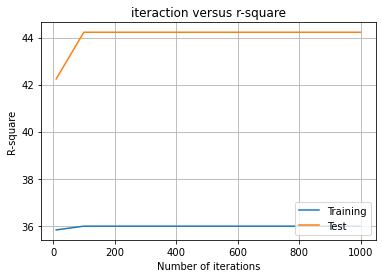

In [25]:
plt.title("iteraction versus r-square")
plt.plot(num_iters, rsq_iter)
plt.plot(num_iters, rsq_iter1)
plt.xlabel("Number of iterations")
plt.ylabel("R-square")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

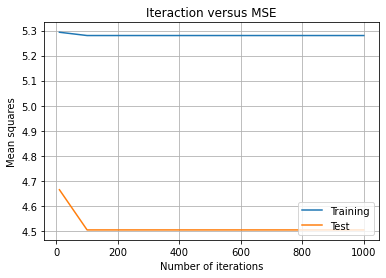

In [26]:
plt.title("Iteraction versus MSE")
plt.plot(num_iters,mse_iter) #training set
plt.plot(num_iters, mse_iter1) #testing set
plt.xlabel("Number of iterations")
plt.ylabel("Mean squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

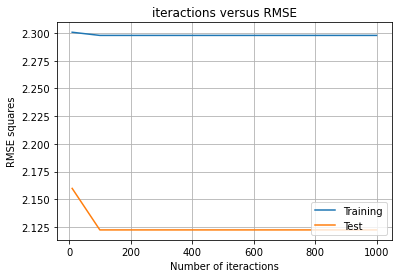

In [27]:
#Iterations versus RMSE
rmse_iter = np.sqrt(mse_iter)
rmse_iter1 = np.sqrt(mse_iter1)
plt.title("iteractions versus RMSE")
plt.plot(num_iters,rmse_iter)
plt.plot(num_iters, rmse_iter1)
plt.xlabel("Number of iteractions")
plt.ylabel("RMSE squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

## Running different learning rates to see the behavior of the data with values 
## learning_rate = [0.01, 0.05, 0.001, 0.0049, 0.005, 0.0001, 0.0005, 0.0001]

In [28]:
def different_learning(X_alpha, y_alpha, num_rows, learning_rate):
    rsq_all = []
    mse_all = []
    rss_all = []
    w = []
    for i in learning_rate:
        results = multiple_linear_reg_model_gda(X_alpha, y_alpha, i , n_train, 100)
        print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
        rss = 0
        for i in range(num_rows):
            rss += (np.dot(results[0].T,X_alpha[i])-y_alpha[i])**2
        tss = np.sum((y_alpha-np.mean(y_alpha))**2 )# TSS 
        #print("RSS:",rss,"TSS:", tss)
        rsq = 1 - (rss/tss)
        print("rsq:", rsq[0])
        rss_all.append(rss)
        mse_all.append(1/num_rows * rss)
        rsq_all.append(rsq[0]*100)
        print('-'*50)
        w.append(results[0])
    return rsq_all, mse_all,rss_all, w

In [29]:
learning_rate = [0.1, 0.05,0.005, 0.00490, .001, 0.0005 ,0.0001]
rsq_alpha, mse_alpha,rss_alpha, w_alpha = different_learning(X_1_train, y_2d_train, n_train, learning_rate)
rsq_alpha1, mse_alpha1,rss_alpha1, w_alpha1 = different_learning(X_1_test, y_2d_test, n_test, learning_rate)

w:  [[ 1.16702597e+01]
 [ 6.00015738e-01]
 [ 3.12757345e-01]
 [ 1.94867533e-01]
 [ 6.96166303e-03]
 [ 2.45629585e-02]
 [ 9.52606722e-02]
 [ 2.62342947e-01]
 [ 2.17228010e-01]
 [-2.26820404e-02]
 [ 2.56860710e-01]
 [-8.00724938e-01]
 [-4.78977280e-01]
 [-9.63030513e-03]
 [-1.68546188e-01]
 [ 4.29043141e-02]
 [-8.05486797e-02]
 [ 4.24107557e-01]
 [ 1.13910057e-01]
 [-3.24456927e-01]
 [ 9.14950867e-02]
 [-1.25030214e-01]
 [-9.01807674e-02]
 [ 4.45311949e-02]
 [-2.01486207e-01]
 [-8.34047520e-02]
 [-2.83551412e-01]] 
initial cost:  72.10654241645241 
final cost:  2.6402648892998006
rsq: 0.3597722655886554
--------------------------------------------------
w:  [[ 1.15737948e+01]
 [ 5.78448832e-01]
 [ 2.50787575e-01]
 [ 1.76108935e-01]
 [-7.67304089e-03]
 [ 5.72596819e-02]
 [ 1.22788043e-01]
 [ 2.63977621e-01]
 [ 2.62801165e-01]
 [-1.59799958e-02]
 [ 2.98365104e-01]
 [-7.61858907e-01]
 [-4.47891545e-01]
 [-4.89358530e-02]
 [-1.56999861e-01]
 [-1.33292820e-02]
 [-9.12256507e-02]
 [ 4.34432217

In [30]:
# The best rsq on training set based off different alphas
print("The best rsq based off different alpha:", max(rsq_alpha))

The best rsq based off different alpha: 35.97722655886554


In [31]:
# The best rsq on testing set based off different alphas
#Though rsq seems to be wrong, the overall mse and rmse, is simulating the problem 
print("The best rsq based off different alpha:", max(rsq_alpha1)) 

The best rsq based off different alpha: 44.16750822307171


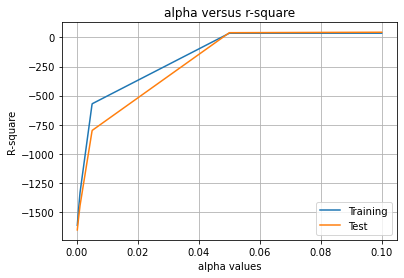

In [32]:
#print(rsq_alpha)
plt.title("alpha versus r-square")
plt.plot(learning_rate, rsq_alpha)
plt.plot(learning_rate, rsq_alpha1)
plt.xlabel("alpha values")
plt.ylabel("R-square")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

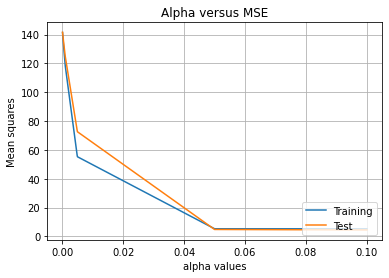

In [33]:
#Learning rate versus Mean squared error
plt.title("Alpha versus MSE")
plt.plot(learning_rate,mse_alpha)
plt.plot(learning_rate,mse_alpha1)
plt.xlabel("alpha values")
plt.ylabel("Mean squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

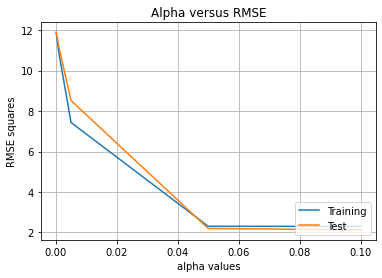

In [34]:
#Learning rate versus RMSE
rmse_alpha = np.sqrt(mse_alpha)
rmse_alpha1 = np.sqrt(mse_alpha1)
plt.title("Alpha versus RMSE")
plt.plot(learning_rate,rmse_alpha)
plt.plot(learning_rate,rmse_alpha1)
plt.xlabel("alpha values")
plt.ylabel("RMSE squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

# Using sklearn library to calculate
## Code below are taken from the demo 02. Mostly used to check whether code above is correct and also to get the graph of the y_prediction (yhat) and y - actual value which would give us a visual for why r-squared is considerably low

In [35]:
#Creating our regression
#Code from DEMO 2
regr = linear_model.LinearRegression()
regr.fit(X_train,y_2d_train)

LinearRegression()

In [36]:
#Code from demo 2
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
print('The rsq(r^2) = ', regr.score(X_train, y_2d_train))

The intercept w0 =  [11.67349687]
The coefficients w[1..d]= [[ 0.60202344  0.31955749  0.19606188  0.00646547  0.01975673  0.08863415
   0.26190377  0.2139851  -0.02387952  0.24977334 -0.80585398 -0.48405696
  -0.00722564 -0.17077724  0.05012469 -0.08208264  0.42275198  0.11686871
  -0.33165225  0.08804325 -0.1296362  -0.08723731  0.07088072 -0.22418959
  -0.07994889 -0.28900817]]
The rsq(r^2) =  0.3598347052194727


In [37]:
#Code from demo 2
y_tr_pred = regr.predict(X_train)
RSS = np.sum((y_tr_pred-y_2d_train)**2)
TSS = np.sum((y_2d_train - np.mean(y_2d_train))**2)
print("RSS = {0:f}".format(RSS))
print("Ein = {0:f}".format(RSS/y_train.shape[0]))
print("RMSE = {0:f}".format(np.sqrt(RSS/y_train.shape[0])))
print("R^2 = {0:f}".format(1-RSS/TSS))

RSS = 2053.925751
Ein = 5.280015
RMSE = 2.297828
R^2 = 0.359835


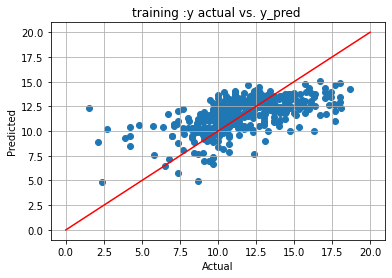

In [38]:
#Code from demo 2
plt.title("training :y actual vs. y_pred ")
plt.scatter(y_2d_train,y_tr_pred)
#Set to 20, because maximum score for y is 20
plt.plot([0, 20],[0, 20],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

# Validating over the testing set

In [39]:
#Code from demo 2
#Testing set seems to be getting different values compared to my test
y_test_pred = regr.predict(X_test)
RSS = np.sum((y_test_pred-y_2d_test)**2)
TSS = np.sum((y_2d_test - np.mean(y_2d_test))**2)
print("RSS = {0:f}".format(RSS))
print("Ein = {0:f}".format(RSS/n_test))
print("RMSE = {0:f}".format(np.sqrt(RSS/n_test)))
print("R^2 = {0:f}".format(1-RSS/TSS))

RSS = 1384.177386
Ein = 5.323759
RMSE = 2.307327
R^2 = 0.340797


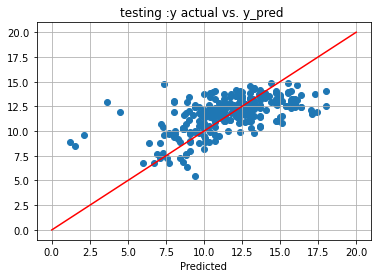

In [40]:
#Code from demo 2
plt.title("testing :y actual vs. y_pred ")
plt.scatter(y_2d_test,y_test_pred)
plt.plot([0,20],[0,20],'r')
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.grid()

# Attempting to use regularization in hopes of getting better rsq values
### Will be using the sklearn regularization library, below is the link to the library
### https://scikit-learn.org/stable/modules/linear_model.html

# ridge regression

In [41]:
def ridge(X_ridge, y_ridge, lamda):
    rsq = []
    mse = []
    rss_all = []
    w_ridge = []
    for l in lamda:
        ridgereg = linear_model.Ridge(alpha = l)
        ridgereg.fit(X_ridge, y_ridge)
        #print('The intercept w0 = ', ridgereg.intercept_)
        #print('The coefficients w[1..d]=', ridgereg.coef_)
        #print('The rsq(r^2) = ', ridgereg.score(X_ridge, y_ridge))
        #print('-'* 70)
        rsq.append(ridgereg.score(X_ridge, y_ridge)*100)
        weight =ridgereg.coef_
        y_ridge_pred = ridgereg.predict(X_ridge)
        w_ridge.append(weight)
        rss = np.sum((y_ridge_pred - y_ridge)**2)
        rss_all.append(rss)
        mse.append(1/len(X_ridge)* rss)
    return rsq, w_ridge, mse, rss_all

In [42]:
lamda = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
rsq_ridge_train,w_ridge_train,mse_ridge_train,rss_ridge_train = ridge(X_train, y_2d_train, lamda) #Couldn't use x_1_train due to matrix size difference
rsq_ridge_test, w_ridge_test,mse_ridge_test, rss_ridge_test = ridge(X_test, y_2d_test, lamda) 
print("Ridge library on training set: ", rsq_ridge_train)
print("*"*60)
print("Ridge library on testing set: ", rsq_ridge_test)

Ridge library on training set:  [35.98347052174922, 35.983470502142524, 35.9834685430519, 35.98342122437836, 35.983274199294016, 35.965286780641605, 34.96607816162343]
************************************************************
Ridge library on testing set:  [44.22376571932869, 44.223765687594415, 44.223762517328126, 44.2236860111319, 44.2234486136049, 44.194840422163786, 42.66025359202025]


In [43]:
#Reshaping the weight list
w_ridge_train = np.array(w_ridge_train).reshape((len(lamda),26))
w_ridge_test = np.array(w_ridge_test).reshape((len(lamda),26))

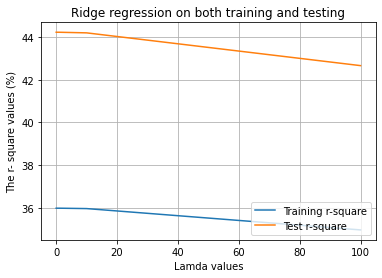

In [44]:
plt.title("Ridge regression on both training and testing")
plt.xlabel("Lamda values")
plt.ylabel("The r- square values (%)")
plt.plot(lamda, rsq_ridge_train)
plt.plot(lamda,rsq_ridge_test)
plt.grid()
plt.legend(['Training r-square', 'Test r-square'], loc='lower right')

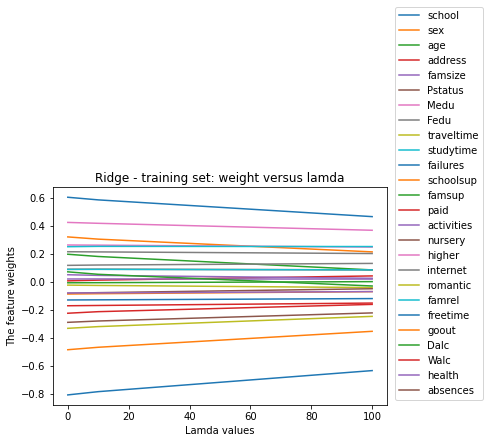

In [45]:
plt.title("Ridge - training set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_ridge_train)
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

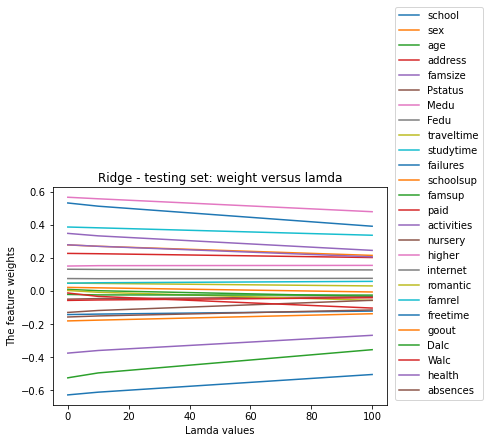

In [46]:
plt.title("Ridge - testing set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_ridge_test)
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

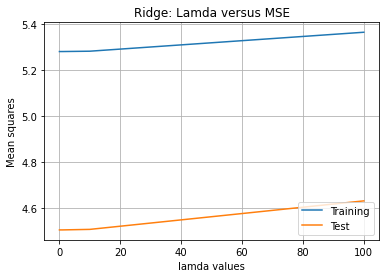

In [47]:
#Learning rate versus Mean squared error
plt.title("Ridge: Lamda versus MSE")
plt.plot(lamda,mse_ridge_train)
plt.plot(lamda,mse_ridge_test)
plt.xlabel("lamda values")
plt.ylabel("Mean squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

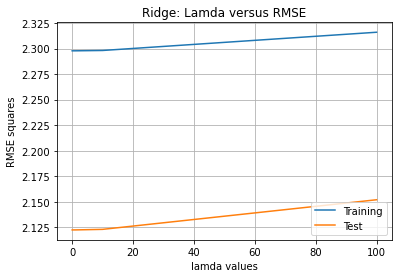

In [48]:
#Learning rate versus RMSE
rmse_ridge_tr = np.sqrt(mse_ridge_train)
rmse_ridge_test = np.sqrt(mse_ridge_test)
plt.title("Ridge: Lamda versus RMSE")
plt.plot(lamda,rmse_ridge_tr)
plt.plot(lamda,rmse_ridge_test)
plt.xlabel("lamda values")
plt.ylabel("RMSE squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

## Multiple regression with Lasso

In [49]:
def lasso(X_lasso, y_lasso):
    lamda = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
    rsq = []
    w = []
    mse = []
    rss_all = []
    for l in lamda:
        lasso_reg = linear_model.Lasso(alpha = l)
        lasso_reg.fit(X_lasso, y_lasso)
        #print('The intercept w0 = ', regr.intercept_)
        #print('The coefficients w[1..d]=', regr.coef_)
        #print('The rsq(r^2) = ', lasso_reg.score(X_train, y_2d_train))
        #print('-'* 70)
        rsq.append(lasso_reg.score(X_lasso, y_lasso)*100)
        weight = lasso_reg.coef_
        y_lasso_pred = lasso_reg.predict(X_lasso)
        w.append(weight)
        #mse_test = metrics.mean_squared_error(y_lasso, y_lasso_pred) <--used this only to check my work
        rss = 0
        for i in range(len(X_lasso)):
            rss += (y_lasso_pred[i] - y_lasso[i])**2
        #print(rss)
        rss_all.append(rss)
        mse.append(1/len(X_lasso)* rss[0])
    return rsq, w, mse, rss_all

In [50]:
rsq_lasso_train, w_lasso_tr, mse_lasso_train, rss_lasso_train = lasso(X_train, y_2d_train) #Couldn't use x_1_train due to matrix size difference
rsq_lasso_test, w_lasso_test, mse_lasso_test, rss_lasso_test = lasso(X_test, y_2d_test) 
print("Lasso library on training set: ", rsq_lasso_train)
print("*"*60)
print("Lasso library on testing set: ", rsq_lasso_test)
#print(mse_lasso_train)

Lasso library on training set:  [35.98307841138752, 35.94609298304833, 33.98086185234547, 19.85857131843981, 3.664142533606163, 0.0, 0.0]
************************************************************
Lasso library on testing set:  [44.22343287633454, 44.19617754012468, 42.58554118217951, 26.8120624641078, 7.605379693364023, 0.0, 0.0]


In [51]:
#Reshaping the weight list
w_lasso_tr = np.array(w_lasso_tr).reshape((len(lamda),26))
w_lasso_test = np.array(w_lasso_test).reshape((len(lamda),26))

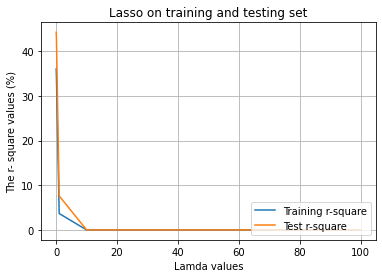

In [52]:
plt.title("Lasso on training and testing set")
plt.xlabel("Lamda values")
plt.ylabel("The r- square values (%)")
plt.plot(lamda, rsq_lasso_train)
plt.plot(lamda, rsq_lasso_test)
plt.legend(['Training r-square', 'Test r-square'], loc='lower right')
plt.grid()

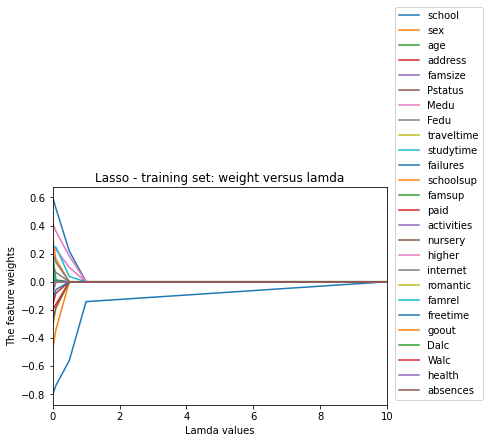

In [53]:
plt.title("Lasso - training set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_lasso_tr)
plt.xlim(0,10) #Limiting x to see the weight better
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

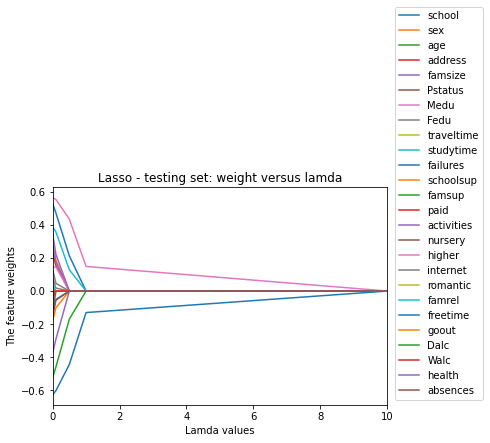

In [54]:
plt.title("Lasso - testing set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_lasso_test)
plt.xlim(0,10) #Limiting x to see the weight better
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

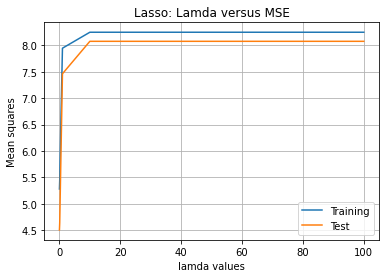

In [55]:
#Learning rate versus Mean squared error
plt.title("Lasso: Lamda versus MSE")
plt.plot(lamda,mse_lasso_train)
plt.plot(lamda,mse_lasso_test)
plt.xlabel("lamda values")
plt.ylabel("Mean squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

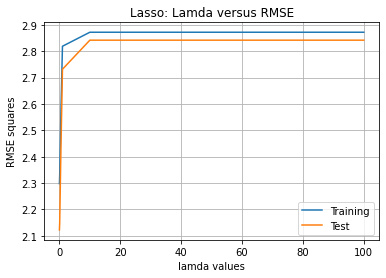

In [56]:
#Learning rate versus RMSE
rmse_lasso_tr = np.sqrt(mse_lasso_train)
rmse_lasso_test = np.sqrt(mse_lasso_test)
plt.title("Lasso: Lamda versus RMSE")
plt.plot(lamda,rmse_lasso_tr)
plt.plot(lamda,rmse_lasso_test)
plt.xlabel("lamda values")
plt.ylabel("RMSE squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

# Polynomial Regression using Sklearn library Polynomial Features
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
## Used this to understand how to use Polynomial features :
### https://harvard-iacs.github.io/2018-CS109A/labs/lab-4/student/ 

In [57]:
def poly_reg(x_poly, y_poly,n_rows,  model_degree, dataset):
    rss_poly = []
    mse_poly = []
    rsq_poly = []
    w_poly = []
    for d in model_degree:
        print('-'*50)
        print("Degree:", d)
        poly_feat = PolynomialFeatures(d)
        x_fitted = poly_feat.fit_transform(x_poly) #for multiple features
        poly_lin = linear_model.LinearRegression()
        poly_lin.fit(x_fitted, y_poly)
        y_poly_pred = poly_lin.predict(x_fitted)
        y_poly_pred = y_poly_pred.reshape(len(y_poly), 1)
        #print('The intercept w0 = ', poly_lin.intercept_)
        #print('The coefficients w[1..d]=', poly_lin.coef_)
        rss = np.sum((y_poly_pred-y_poly)**2)
        tss = np.sum((y_poly - np.mean(y_poly))**2)
        rsq = 1-rss/tss

        rss_poly.append(rss)
        mse_poly.append(1/n_rows * rss)
        rsq_poly.append(rsq*100)
        w_poly.append(poly_lin.coef_)
        
        
        print("RSS = {0:f}".format(rss))
        print("Ein = {0:f}".format(rss/n_rows))
        print("RMSE = {0:f}".format(np.sqrt(rss/n_rows)))
        print("R^2 = {0:f}".format(rsq))
        print('-'*50)
        #Code from demo 2
        plt.title("Polynomial " + dataset + "- y-actual vs y-predicted at degree " + str(d))
        plt.grid()
        plt.scatter(y_poly,y_poly_pred)
        plt.plot([0,20],[0,20],'r') 
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.show(block = False)
    #print(w_poly)
    return w_poly, rsq_poly, mse_poly, rss_poly

Polynomial on training set:
--------------------------------------------------
Degree: 2
RSS = 84.338373
Ein = 0.216808
RMSE = 0.465627
R^2 = 0.973714
--------------------------------------------------


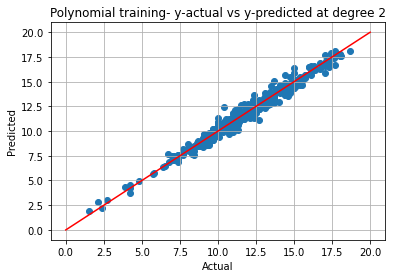

--------------------------------------------------
Degree: 3
RSS = 0.000000
Ein = 0.000000
RMSE = 0.000000
R^2 = 1.000000
--------------------------------------------------


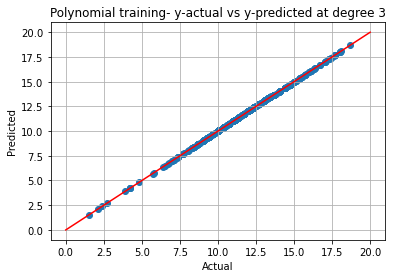

--------------------------------------------------
Degree: 4
RSS = 0.000000
Ein = 0.000000
RMSE = 0.000000
R^2 = 1.000000
--------------------------------------------------


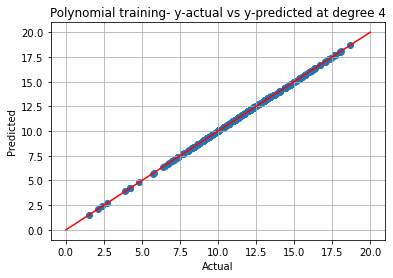

--------------------------------------------------
Degree: 5
RSS = 0.000000
Ein = 0.000000
RMSE = 0.000000
R^2 = 1.000000
--------------------------------------------------


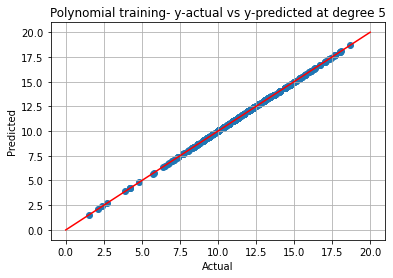

Polynomial on testing set:
--------------------------------------------------
Degree: 2
RSS = 0.000000
Ein = 0.000000
RMSE = 0.000000
R^2 = 1.000000
--------------------------------------------------


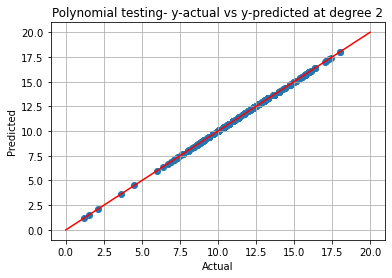

--------------------------------------------------
Degree: 3
RSS = 0.000000
Ein = 0.000000
RMSE = 0.000000
R^2 = 1.000000
--------------------------------------------------


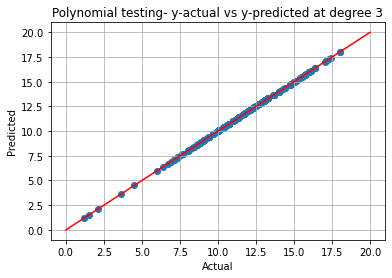

--------------------------------------------------
Degree: 4
RSS = 0.000000
Ein = 0.000000
RMSE = 0.000000
R^2 = 1.000000
--------------------------------------------------


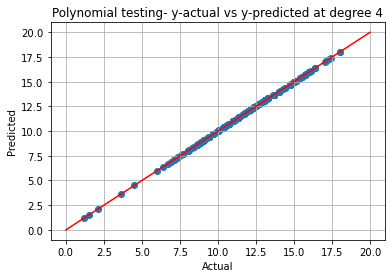

--------------------------------------------------
Degree: 5
RSS = 0.000000
Ein = 0.000000
RMSE = 0.000000
R^2 = 1.000000
--------------------------------------------------


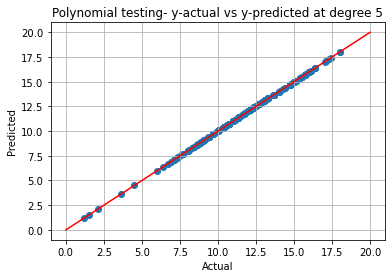

In [58]:
model_degree = np.array(range(2,6))
print("Polynomial on training set:")
w_poly_train, rsq_poly_train, mse_poly_train, rss_poly_train = poly_reg(X_train,y_2d_train,n_train, model_degree, 'training')
print("Polynomial on testing set:")
w_poly_test, rsq_poly_test, mse_poly_test, rss_poly_test = poly_reg(X_test,y_2d_test,n_test, model_degree, 'testing')

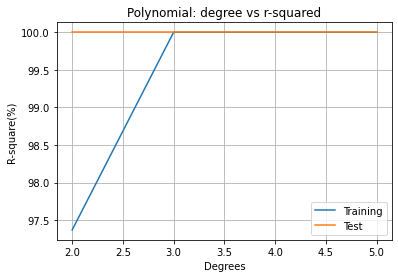

In [59]:
plt.title("Polynomial: degree vs r-squared")
plt.plot(model_degree, rsq_poly_train)
plt.plot(model_degree, rsq_poly_test)
plt.xlabel("Degrees")
plt.ylabel("R-square(%)")
plt.grid()
plt.legend(['Training', 'Test'], loc='lower right')

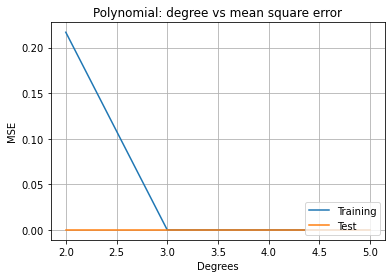

In [60]:
plt.title("Polynomial: degree vs mean square error")
plt.plot(model_degree, mse_poly_train)
plt.plot(model_degree, mse_poly_test)
plt.xlabel("Degrees")
plt.ylabel("MSE")
plt.grid()
plt.legend(['Training', 'Test'], loc='lower right')

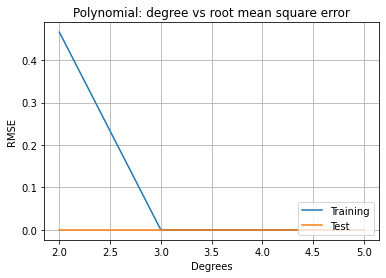

In [61]:
rmse_poly_train = np.sqrt(np.array(mse_poly_train))
rmse_poly_test = np.sqrt(np.array(mse_poly_test))
plt.title("Polynomial: degree vs root mean square error")
plt.plot(model_degree, rmse_poly_train)
plt.plot(model_degree, rmse_poly_test)
plt.xlabel("Degrees")
plt.ylabel("RMSE")
plt.grid()
plt.legend(['Training', 'Test'], loc='lower right')

# Code below is to make the table of results
## Any code below is not related to the project more technically or extra code that is not needed

In [62]:
# Multiple Linear regression


In [63]:
'''
def runningtrain(num_rows):
    #Testing numbers on training set
    learning_rate = [0.1, 0.05,0.005, 0.00490, .001, 0.0005 ,0.0001]
    num_iters = [10,100,500, 1000]
    track = {}
    best_rsq = 0
    for nums in num_iters:
        print("*"* 50)
        print(nums)
        for alpha in learning_rate:
            results = multiple_linear_reg_model_gda(X_1_train, y_2d_train, alpha, n_train, nums)
            print("Iter is:", nums, "Alpha is:", alpha)
            #print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            print("\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            #print('-'*50)
            rss = 0
            for i in range(n_train):
                rss += np.sum((np.dot(results[0].T,X_1_train[i])-y_2d_train[i])**2)
            tss = np.sum((y_2d_train-np.mean(y_2d_train))**2) # TSS 
            print("RSS:",rss,"TSS:", tss)
            rsq = 1 - (rss/tss)
            print(rsq)
            if best_rsq<rsq:
                best_rsq = rsq
                track = {(nums,alpha): results, "RSS": rss ,"TSS":tss, "rsq":best_rsq*100}
            print('-'*50)
        print("*"* 50)
    return track
'''

'\ndef runningtrain(num_rows):\n    #Testing numbers on training set\n    learning_rate = [0.1, 0.05,0.005, 0.00490, .001, 0.0005 ,0.0001]\n    num_iters = [10,100,500, 1000]\n    track = {}\n    best_rsq = 0\n    for nums in num_iters:\n        print("*"* 50)\n        print(nums)\n        for alpha in learning_rate:\n            results = multiple_linear_reg_model_gda(X_1_train, y_2d_train, alpha, n_train, nums)\n            print("Iter is:", nums, "Alpha is:", alpha)\n            #print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])\n            print("\ninitial cost: ", results[1], "\nfinal cost: ", results[2])\n            #print(\'-\'*50)\n            rss = 0\n            for i in range(n_train):\n                rss += np.sum((np.dot(results[0].T,X_1_train[i])-y_2d_train[i])**2)\n            tss = np.sum((y_2d_train-np.mean(y_2d_train))**2) # TSS \n            print("RSS:",rss,"TSS:", tss)\n            rsq = 1 - (rss/tss)\n            print(rsq)\

In [64]:
'''
def runningtest(num_rows):
    #Testing numbers on training set
    learning_rate = [0.1, 0.05,0.005, 0.00490, .001, 0.0005 ,0.0001]
    num_iters = [10,100,500, 1000]
    track = {}
    best_rsq = 0
    for nums in num_iters:
        print("*"* 50)
        print(nums)
        for alpha in learning_rate:
            results = multiple_linear_reg_model_gda(X_1_test, y_2d_test, alpha, num_rows, nums)
            print("Iter is:", nums, "Alpha is:", alpha)
            #print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            print("\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            #print('-'*50)
            rss = 0
            for i in range(num_rows):
                rss += np.sum((np.dot(results[0].T,X_1_test[i])-y_2d_test[i])**2)
                #I seem to be getting different result from time to time whether I take out np.sum or not
                #Issue with the kernel, probably some globals that are causing issues
            tss = np.sum((y_2d_test-np.mean(y_2d_test))**2) # TSS 
            print("RSS:",rss,"TSS:", tss)
            rsq = 1 - (rss/tss)
            print(rsq)
            if best_rsq<rsq:
                best_rsq = rsq
                track = {(nums,alpha): results, "RSS": rss ,"TSS":tss, "rsq":best_rsq*100}
            print('-'*50)
        print("*"* 50)
    return track
'''

'\ndef runningtest(num_rows):\n    #Testing numbers on training set\n    learning_rate = [0.1, 0.05,0.005, 0.00490, .001, 0.0005 ,0.0001]\n    num_iters = [10,100,500, 1000]\n    track = {}\n    best_rsq = 0\n    for nums in num_iters:\n        print("*"* 50)\n        print(nums)\n        for alpha in learning_rate:\n            results = multiple_linear_reg_model_gda(X_1_test, y_2d_test, alpha, num_rows, nums)\n            print("Iter is:", nums, "Alpha is:", alpha)\n            #print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])\n            print("\ninitial cost: ", results[1], "\nfinal cost: ", results[2])\n            #print(\'-\'*50)\n            rss = 0\n            for i in range(num_rows):\n                rss += np.sum((np.dot(results[0].T,X_1_test[i])-y_2d_test[i])**2)\n                #I seem to be getting different result from time to time whether I take out np.sum or not\n                #Issue with the kernel, probably some globals tha

In [65]:
#Table for iteractions
rss_iter = np.array(rss_iter)
mse_iter= np.array(mse_iter)
rsq_iter = np.array(rsq_iter).reshape((4,1))
iteract = np.hstack((rss_iter, mse_iter))
iteract1 = np.hstack((rmse_iter, rsq_iter))
iter_comp = np.hstack((iteract, iteract1))

rss_iter1 = np.array(rss_iter1)
mse_iter1= np.array(mse_iter1)
rsq_iter1 = np.array(rsq_iter1).reshape((4,1))
iteract2 = np.hstack((rss_iter1, mse_iter1))
iteract3 = np.hstack((rmse_iter1, rsq_iter1))
iter_comp2 = np.hstack((iteract2, iteract3))

iter_comp3 = np.hstack((iter_comp, iter_comp2))
print(iter_comp3)

[[2059.02904728    5.2931338     2.30068116   35.82441154 1212.86903395
     4.6648809     2.15983354   42.23813237]
 [2053.92575067    5.28001478    2.29782828   35.98347052 1171.17520895
     4.50452003    2.12238546   44.22376571]
 [2053.92575067    5.28001478    2.29782828   35.98347052 1171.17520884
     4.50452003    2.12238546   44.22376572]
 [2053.92575067    5.28001478    2.29782828   35.98347052 1171.17520884
     4.50452003    2.12238546   44.22376572]]


In [66]:
#Table for alphas
rss_alpha = np.array(rss_alpha)
mse_alpha= np.array(mse_alpha)
rsq_alpha = np.array(rsq_alpha).reshape((7,1))
iteract4 = np.hstack((rss_alpha, mse_alpha))
iteract5 = np.hstack((rmse_alpha, rsq_alpha))
alpha_comp = np.hstack((iteract4, iteract5))

rss_alpha1 = np.array(rss_alpha1)
mse_alpha1= np.array(mse_alpha1)
rsq_alpha1 = np.array(rsq_alpha1).reshape((7,1))
iteract6 = np.hstack((rss_alpha1, mse_alpha1))
iteract7 = np.hstack((rmse_alpha1, rsq_alpha1))
alpha_comp2 = np.hstack((iteract6, iteract7))

alpha_comp = np.hstack((alpha_comp, alpha_comp2))
print(alpha_comp)

[[ 2.05412608e+03  5.28052978e+00  2.29794033e+00  3.59772266e+01
   1.17235649e+03  4.50906342e+00  2.12345554e+00  4.41675082e+01]
 [ 2.06410018e+03  5.30617012e+00  2.30351256e+00  3.56663552e+01
   1.25419713e+03  4.82383513e+00  2.19632309e+00  4.02699164e+01]
 [ 2.14875499e+04  5.52379175e+01  7.43222157e+00 -5.69721567e+02
   1.88668722e+04  7.25648932e+01  8.51850299e+00 -7.98518922e+02]
 [ 2.18824268e+04  5.62530252e+01  7.50020168e+00 -5.82029046e+02
   1.91151072e+04  7.35196430e+01  8.57435963e+00 -8.10340902e+02]
 [ 4.59471319e+04  1.18116020e+02  1.08681195e+01 -1.33207510e+03
   3.24193954e+04  1.24689982e+02  1.11664669e+01 -1.44394644e+03]
 [ 5.07450746e+04  1.30450063e+02  1.14214738e+01 -1.48161684e+03
   3.47825714e+04  1.33779121e+02  1.15662924e+01 -1.55649071e+03]
 [ 5.49803510e+04  1.41337663e+02  1.18885518e+01 -1.61362147e+03
   3.68128821e+04  1.41588008e+02  1.18990759e+01 -1.65318255e+03]]


In [67]:
alpha_table = pd.DataFrame(alpha_comp, columns = ['RSS', 'MSE','RMSE', 'R^2','RSS', 'MSE','RMSE', 'R^2'])
iter_table = pd.DataFrame(iter_comp3, columns = ['RSS', 'MSE','RMSE', 'R^2','RSS', 'MSE','RMSE', 'R^2'])

#alpha_table.to_csv("LinRegAlpha.csv")
#iter_table.to_csv("LinRegIter.csv")
print(alpha_table)
print(iter_table)

            RSS         MSE       RMSE          R^2           RSS         MSE  \
0   2054.126084    5.280530   2.297940    35.977227   1172.356489    4.509063   
1   2064.100175    5.306170   2.303513    35.666355   1254.197133    4.823835   
2  21487.549911   55.237918   7.432222  -569.721567  18866.872241   72.564893   
3  21882.426810   56.253025   7.500202  -582.029046  19115.107184   73.519643   
4  45947.131938  118.116020  10.868119 -1332.075101  32419.395375  124.689982   
5  50745.074588  130.450063  11.421474 -1481.616844  34782.571368  133.779121   
6  54980.350970  141.337663  11.888552 -1613.621467  36812.882116  141.588008   

        RMSE          R^2  
0   2.123456    44.167508  
1   2.196323    40.269916  
2   8.518503  -798.518922  
3   8.574360  -810.340902  
4  11.166467 -1443.946438  
5  11.566292 -1556.490707  
6  11.899076 -1653.182549  
           RSS       MSE      RMSE        R^2          RSS       MSE  \
0  2059.029047  5.293134  2.300681  35.824412  1212.869

In [68]:
# Creating the table for the regularizations
#Ridge
mse_ridge_train = np.array(mse_ridge_train).reshape((7,1))
rss_ridge_train = np.array(rss_ridge_train).reshape((7,1))
rsq_ridge_train = np.array(rsq_ridge_train).reshape((7,1))
rmse_ridge_tr = np.array(rmse_ridge_tr).reshape((7,1))
        
A = np.hstack((rss_ridge_train, mse_ridge_train))
B = np.hstack((rmse_ridge_tr, rsq_ridge_train))
C = np.hstack((A, B))
#print(C)
mse_ridge_test = np.array(mse_ridge_test).reshape((7,1))
rss_ridge_test = np.array(rss_ridge_test).reshape((7,1))
rsq_ridge_test = np.array(rsq_ridge_test).reshape((7,1))
rmse_ridge_test = np.array(rmse_ridge_test).reshape((7,1))
        
A = np.hstack((rss_ridge_test, mse_ridge_test))
B = np.hstack((rmse_ridge_tr, rsq_ridge_test))
D = np.hstack((A, B))
#print(C.shape, D.shape)
E = np.hstack((C, D))
#rsq_train,w_ridge_train,mse_ridge_train,rss_ridge_train

In [69]:
#Lasso
mse_lasso_train = np.array(mse_lasso_train).reshape((7,1))
rss_lasso_train = np.array(rss_lasso_train).reshape((7,1))
rsq_lasso_train = np.array(rsq_lasso_train).reshape((7,1))
rmse_lasso_tr = np.array(rmse_lasso_tr).reshape((7,1))
#print(rmse_lasso_tr.shape)
#print(mse_lasso_train.shape)
#print(rss_lasso_train.shape)
#print(rsq_lasso_train.shape)
        
part1 = np.hstack((rss_lasso_train, mse_lasso_train))
part2 = np.hstack((rmse_lasso_tr, rsq_lasso_train))
part3 = np.hstack((part1, part2))

mse_lasso_test = np.array(mse_lasso_test).reshape((7,1))
rss_lasso_test = np.array(rss_lasso_test).reshape((7,1))
rsq_lasso_test = np.array(rsq_lasso_test).reshape((7,1))
rmse_lasso_test = np.array(rmse_lasso_tr).reshape((7,1))
        
part4 = np.hstack((rss_lasso_test, mse_lasso_test))
part5 = np.hstack((rmse_lasso_tr, rsq_lasso_test))
part6 = np.hstack((part4, part5))

part7 = np.hstack((part3, part6))
#print(E.shape)
part8 = np.hstack((E, part7))

result_reg = pd.DataFrame(part8, columns = ['RSS', 'MSE','RMSE', 'R^2','RSS', 'MSE','RMSE', 'R^2', 'RSS', 'MSE','RMSE', 'R^2','RSS', 'MSE','RMSE', 'R^2'] )

In [70]:
#print(result_reg)
#result_reg.to_csv("LinRegularization.csv")

In [71]:
rsq_poly_train = np.array(rsq_poly_train).reshape((4,1))
mse_poly_train = np.array(mse_poly_train).reshape((4,1))
rss_poly_train = np.array(rss_poly_train).reshape((4,1))
rmse_poly_train = np.array(mse_poly_train).reshape((4,1))

rsq_poly_test = np.array(rsq_poly_test).reshape((4,1))
mse_poly_test = np.array(mse_poly_test).reshape((4,1))
rss_poly_test = np.array(rss_poly_test).reshape((4,1))
rmse_poly_test = np.array(mse_poly_test).reshape((4,1))

partA = np.hstack((rss_poly_train, mse_poly_train))
partB = np.hstack((rmse_poly_train, rsq_poly_train))
partC = np.hstack((partA, partB))

print(partC)
partD = np.hstack((rss_poly_test, mse_poly_test))
partE = np.hstack((rmse_poly_train, rsq_poly_test))
partF = np.hstack((partD, partE))
print(partF)
partG = np.hstack((partC, partF))
poly_table = pd.DataFrame(partG, columns = ['RSS', 'MSE','RMSE', 'R^2','RSS', 'MSE','RMSE', 'R^2'])
print(poly_table)
#poly_table.to_csv("polyReg.csv")

[[8.43383730e+01 2.16808157e-01 2.16808157e-01 9.73713510e+01]
 [8.71904293e-26 2.24139921e-28 2.24139921e-28 1.00000000e+02]
 [5.00169368e-25 1.28578244e-27 1.28578244e-27 1.00000000e+02]
 [4.22730995e-24 1.08671207e-26 1.08671207e-26 1.00000000e+02]]
[[3.31479845e-26 1.27492248e-28 2.16808157e-01 1.00000000e+02]
 [6.10981153e-26 2.34992751e-28 2.24139921e-28 1.00000000e+02]
 [3.92978209e-25 1.51145465e-27 1.28578244e-27 1.00000000e+02]
 [1.79423203e-23 6.90089241e-26 1.08671207e-26 1.00000000e+02]]
            RSS           MSE          RMSE         R^2           RSS  \
0  8.433837e+01  2.168082e-01  2.168082e-01   97.371351  3.314798e-26   
1  8.719043e-26  2.241399e-28  2.241399e-28  100.000000  6.109812e-26   
2  5.001694e-25  1.285782e-27  1.285782e-27  100.000000  3.929782e-25   
3  4.227310e-24  1.086712e-26  1.086712e-26  100.000000  1.794232e-23   

            MSE          RMSE    R^2  
0  1.274922e-28  2.168082e-01  100.0  
1  2.349928e-28  2.241399e-28  100.0  
2  1.511455